In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f10336d31d9cd7f238af90c297b605f


In [4]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform (low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform (low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [7]:
# Create an empty list to hold the weather data. 
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#Create Counters
record_count = 1
set_count = 1 

Beginning Data Retrieval
------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Cloudiness": city_clouds,
                          "Country": city_country,
                          "Date": city_date,
                          "Humidity": city_humidity,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | ayan
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | vao
Processing Record 9 of Set 1 | baijiantan
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | agadez
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | toora-khem
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | pucallpa
Processing Record 20 of Set 1 | takaungu
Processing Record 21 of Set 1 | vieira de leiria
Processing Record 22 of Set 1 | opuwo
Processing Record 23 of Set 1 | albany
Processing Record 24 of S

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Pierre,52,RE,2021-04-24 16:24:42,83,-21.3393,55.4781,77.00,26.46
1,Yellowknife,20,CA,2021-04-24 16:22:46,57,62.4560,-114.3525,15.80,10.36
2,Ayan,84,RU,2021-04-24 16:24:42,75,56.4500,138.1667,25.52,11.77
3,Rikitea,100,PF,2021-04-24 16:24:43,73,-23.1203,-134.9692,77.86,13.76
4,East London,0,ZA,2021-04-24 16:20:57,82,-33.0153,27.9116,66.20,4.61
5,Saint-Philippe,86,RE,2021-04-24 16:24:43,83,-21.3585,55.7679,77.00,26.46
6,Vao,100,NC,2021-04-24 16:24:43,66,-22.6667,167.4833,76.08,10.58
7,Baijiantan,25,CN,2021-04-24 16:24:44,25,45.6333,85.1833,46.58,9.35
8,Dunedin,14,NZ,2021-04-24 16:21:56,81,-45.8742,170.5036,50.00,10.00
9,Agadez,3,NE,2021-04-24 16:24:44,7,19.7500,10.2500,102.36,10.20


In [34]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Pierre,RE,2021-04-24 16:24:42,-21.3393,55.4781,77.00,83,52,26.46
1,Yellowknife,CA,2021-04-24 16:22:46,62.4560,-114.3525,15.80,57,20,10.36
2,Ayan,RU,2021-04-24 16:24:42,56.4500,138.1667,25.52,75,84,11.77
3,Rikitea,PF,2021-04-24 16:24:43,-23.1203,-134.9692,77.86,73,100,13.76
4,East London,ZA,2021-04-24 16:20:57,-33.0153,27.9116,66.20,82,0,4.61
5,Saint-Philippe,RE,2021-04-24 16:24:43,-21.3585,55.7679,77.00,83,86,26.46
6,Vao,NC,2021-04-24 16:24:43,-22.6667,167.4833,76.08,66,100,10.58
7,Baijiantan,CN,2021-04-24 16:24:44,45.6333,85.1833,46.58,25,25,9.35
8,Dunedin,NZ,2021-04-24 16:21:56,-45.8742,170.5036,50.00,81,14,10.00
9,Agadez,NE,2021-04-24 16:24:44,19.7500,10.2500,102.36,7,3,10.20


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

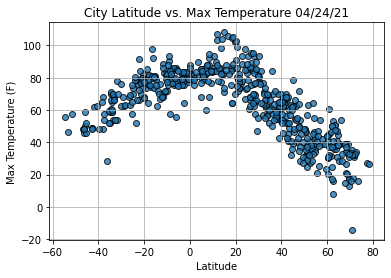

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

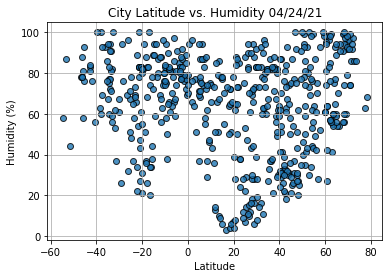

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

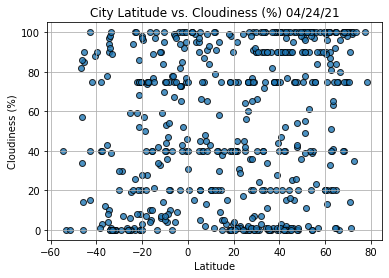

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

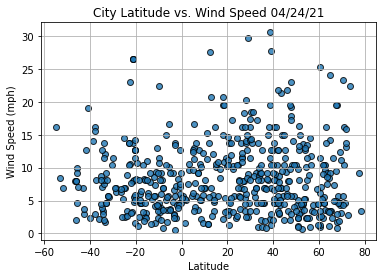

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2021-04-24 16:24:45
Lat                      -34.5322
Lng                       20.0403
Max Temp                     60.8
Humidity                       77
Cloudiness                     94
Wind Speed                   3.44
Name: 13, dtype: object

In [43]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
529     True
530    False
531     True
532     True
533    False
Name: Lat, Length: 534, dtype: bool

In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yellowknife,CA,2021-04-24 16:22:46,62.4560,-114.3525,15.80,57,20,10.36
2,Ayan,RU,2021-04-24 16:24:42,56.4500,138.1667,25.52,75,84,11.77
7,Baijiantan,CN,2021-04-24 16:24:44,45.6333,85.1833,46.58,25,25,9.35
9,Agadez,NE,2021-04-24 16:24:44,19.7500,10.2500,102.36,7,3,10.20
10,Qaanaaq,GL,2021-04-24 16:24:44,77.4840,-69.3632,27.21,63,100,9.22


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

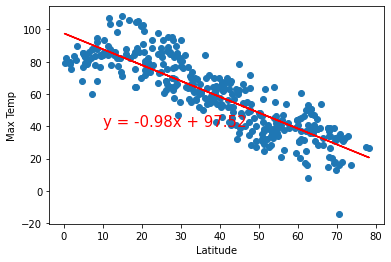

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

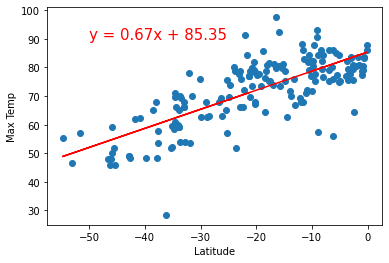

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

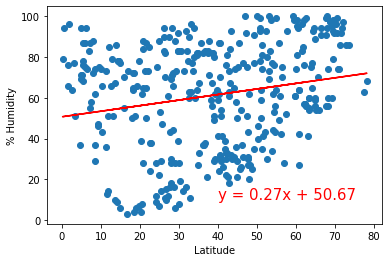

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

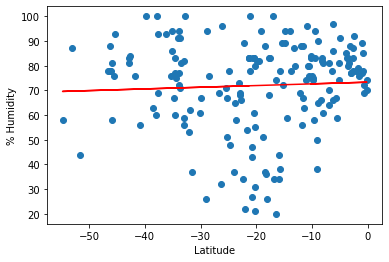

In [58]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

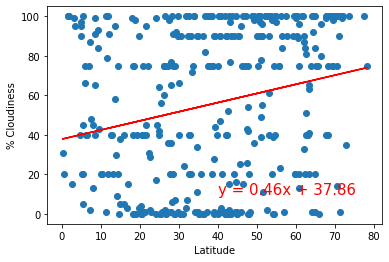

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

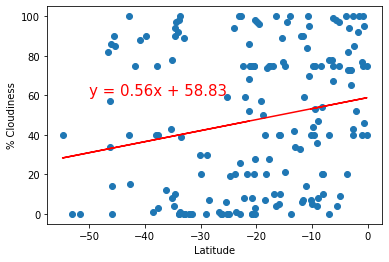

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

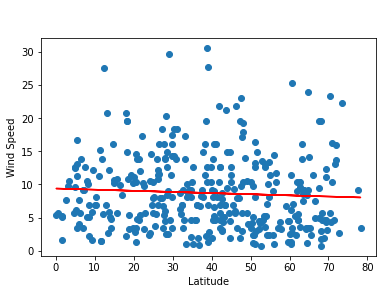

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

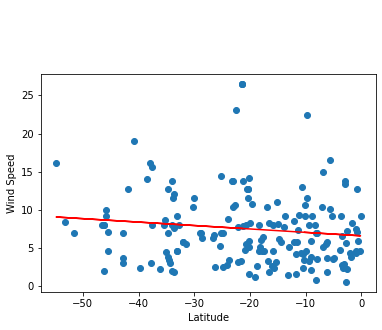

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))